In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
    # so it does not look messy in the lesson

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format
    # set some formats f default number type (2 decimals)

import env
import wrangle
import explore

### Acquire

In [2]:
df = pd.read_csv("zillow.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   typeconstructiontypeid        222 non-null    float64
 3   storytypeid                   50 non-null     float64
 4   heatingorsystemtypeid         49439 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77380 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77380 non-null  float64
 11  bedroomcnt                    77380 non-null  float64
 12  buildingqualitytypeid         49671 non-null  float64
 13  c

### Prepare

In [4]:
df = wrangle.clean_zillow(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72114 entries, 10711855 to 167688532
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           72114 non-null  int64   
 1   has_heating_system   72114 non-null  int64   
 2   bathrooms            72114 non-null  float64 
 3   bedrooms             72114 non-null  float64 
 4   quality              72114 non-null  float64 
 5   square_feet          72114 non-null  float64 
 6   fips                 72114 non-null  float64 
 7   has_fireplace        72114 non-null  float64 
 8   full_bathrooms       72114 non-null  float64 
 9   latitude             72114 non-null  float64 
 10  longitude            72114 non-null  float64 
 11  lot_square_feet      72114 non-null  float64 
 12  has_pool             72114 non-null  float64 
 13  land_type            72114 non-null  float64 
 14  city                 72114 non-null  float64 
 15  county  

In [6]:
train, validate, test = wrangle.split_zillow(df)

In [7]:
scale_columns = ['bathrooms', 'bedrooms', 'quality', 
                  'square_feet', 'full_bathrooms', 
                  'latitude', 'longitude', 'lot_square_feet', 'has_pool', 
                  'land_type', 'city', 'county', 'zip_code', 
                 'room_count', 'unitcnt', 'yearbuilt', 'structure_tax_value', 
                 'tax_value',  'land_tax_value', 'taxamount',
                  'house_age', 'tax_rate']

In [8]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test, scale_columns)

In [9]:
train.head()

,Unnamed: 0,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,latitude,...,tax_value,land_tax_value,taxamount,logerror,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,level_of_log_error
parcelid,,,,,,,,,,,,,,,,,,,,,
11241479,13642,1,1.00,3.00,5.00,"1,137.00","6,037.00",0.00,1.00,"34,473,908.00",...,"177,732.00","53,427.00","2,310.83",0.05,1,0,0,91.00,76.91,L4
17134622,72918,0,2.00,4.00,6.00,"1,748.00","6,111.00",1.00,2.00,"34,227,951.00",...,"81,397.00","18,751.00",877.42,0.04,0,0,1,52.00,92.77,L4
14705916,69223,0,2.50,2.00,6.00,"1,217.00","6,059.00",0.00,2.00,"33,681,394.00",...,"517,777.00","408,727.00","5,976.06",0.03,0,1,0,35.00,86.64,L4
12023844,28723,1,2.00,2.00,8.00,"1,216.00","6,037.00",0.00,2.00,"34,112,458.00",...,"536,601.00","429,284.00","6,585.60",0.06,1,0,0,36.00,81.48,L5
14481309,64066,0,2.00,2.00,6.00,"1,631.00","6,059.00",0.00,2.00,"33,616,104.00",...,"647,208.00","486,760.00","6,666.82",-0.03,0,1,0,34.00,97.08,L2


In [10]:
binary_vars = ['in_los_angeles', 'in_orange_county', 'in_ventura', 
               'has_heating_system', 'has_fireplace', 'has_pool']
categorical_vars = ['quality', 'full_bathrooms', 'land_type', 'county', 
                    'zip_code']
quant_vars = ['bedrooms', 'bathrooms', 'square_feet', 'lot_square_feet', 
             'tax_rate', 'structure_tax_value', 'tax_value', 
              'land_tax_value', 'taxamount']
categorical_target = 'level_of_log_error'
continuous_target = 'logerror'

In [11]:
df.level_of_log_error.value_counts()

L3    14424
L5    14423
L4    14423
L2    14423
L1    14421
Name: level_of_log_error, dtype: int64

# Univariate Exploration

Boxplots and Histograms of Categoriacal Variables ['quality', 'full_bathrooms', 'land_type', 'county', 'zip_code']


<AxesSubplot:title={'center':'Distribution of Zip Code'}, xlabel='zip_code', ylabel='Count'>

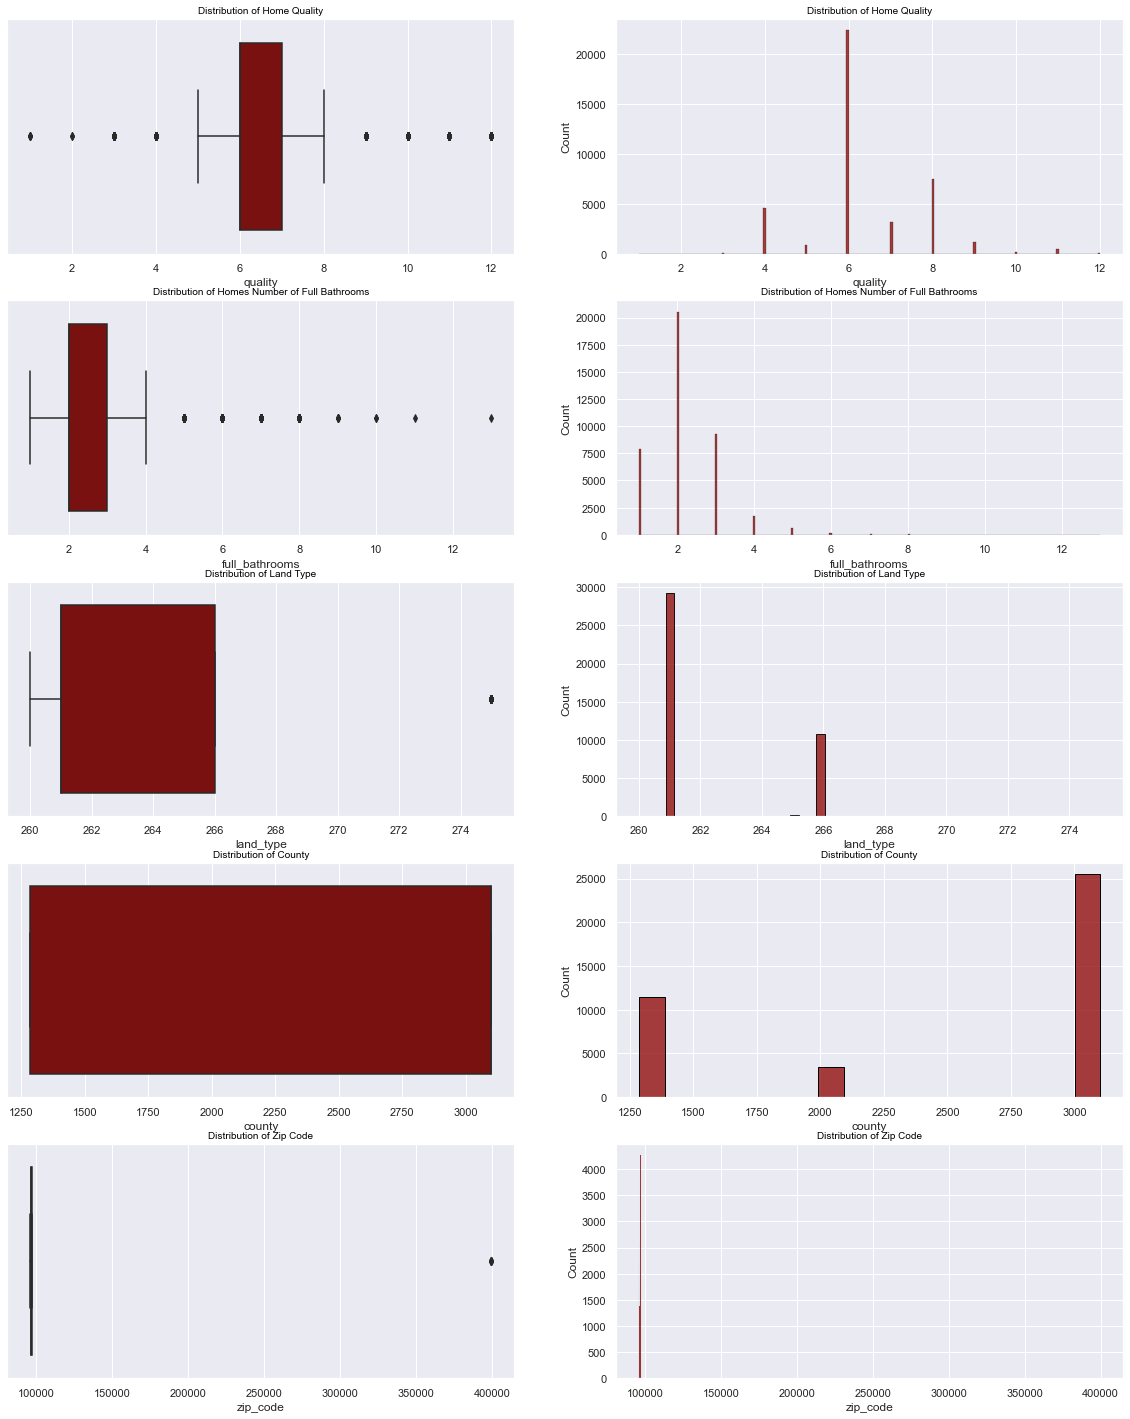

In [12]:
print(f'Boxplots and Histograms of Categoriacal Variables', categorical_vars)
plt.subplots(5, 2, figsize=(20,25), sharey=True)
sns.set(style="darkgrid")

plt.subplot(5,2,1)
plt.title("Distribution of Home Quality", size=10, color='black')
sns.boxplot(train.quality, color='darkred')

plt.subplot(5,2,2)
plt.title("Distribution of Home Quality", size=10, color='black')
sns.histplot(train.quality, color='darkred', ec='black')

plt.subplot(5,2,3)
plt.title("Distribution of Homes Number of Full Bathrooms", size=10, color='black')
sns.boxplot(train.full_bathrooms, color='darkred')

plt.subplot(5,2,4)
plt.title("Distribution of Homes Number of Full Bathrooms", size=10, color='black')
sns.histplot(train.full_bathrooms, color='darkred', ec='black')

plt.subplot(5,2,5)
plt.title("Distribution of Land Type", size=10, color='black')
sns.boxplot(train.land_type, color='darkred')

plt.subplot(5,2,6)
plt.title("Distribution of Land Type", size=10, color='black')
sns.histplot(train.land_type, color='darkred', ec='black')

plt.subplot(5,2,7)
plt.title("Distribution of County", size=10, color='black')
sns.boxplot(train.county, color='darkred')

plt.subplot(5,2,8)
plt.title("Distribution of County", size=10, color='black')
sns.histplot(train.county, color='darkred', ec='black')

plt.subplot(5,2,9)
plt.title("Distribution of Zip Code", size=10, color='black')
sns.boxplot(train.zip_code, color='darkred')

plt.subplot(5,2,10)
plt.title("Distribution of Zip Code", size=10, color='black')
sns.histplot(train.zip_code, color='darkred', ec='black')

Boxplots and Histograms of Quantitative Variables ['bedrooms', 'bathrooms', 'square_feet', 'lot_square_feet', 'tax_rate', 'structure_tax_value', 'tax_value', 'land_tax_value', 'taxamount']


<AxesSubplot:title={'center':'Distribution of Tax Amount'}, xlabel='taxamount', ylabel='Count'>

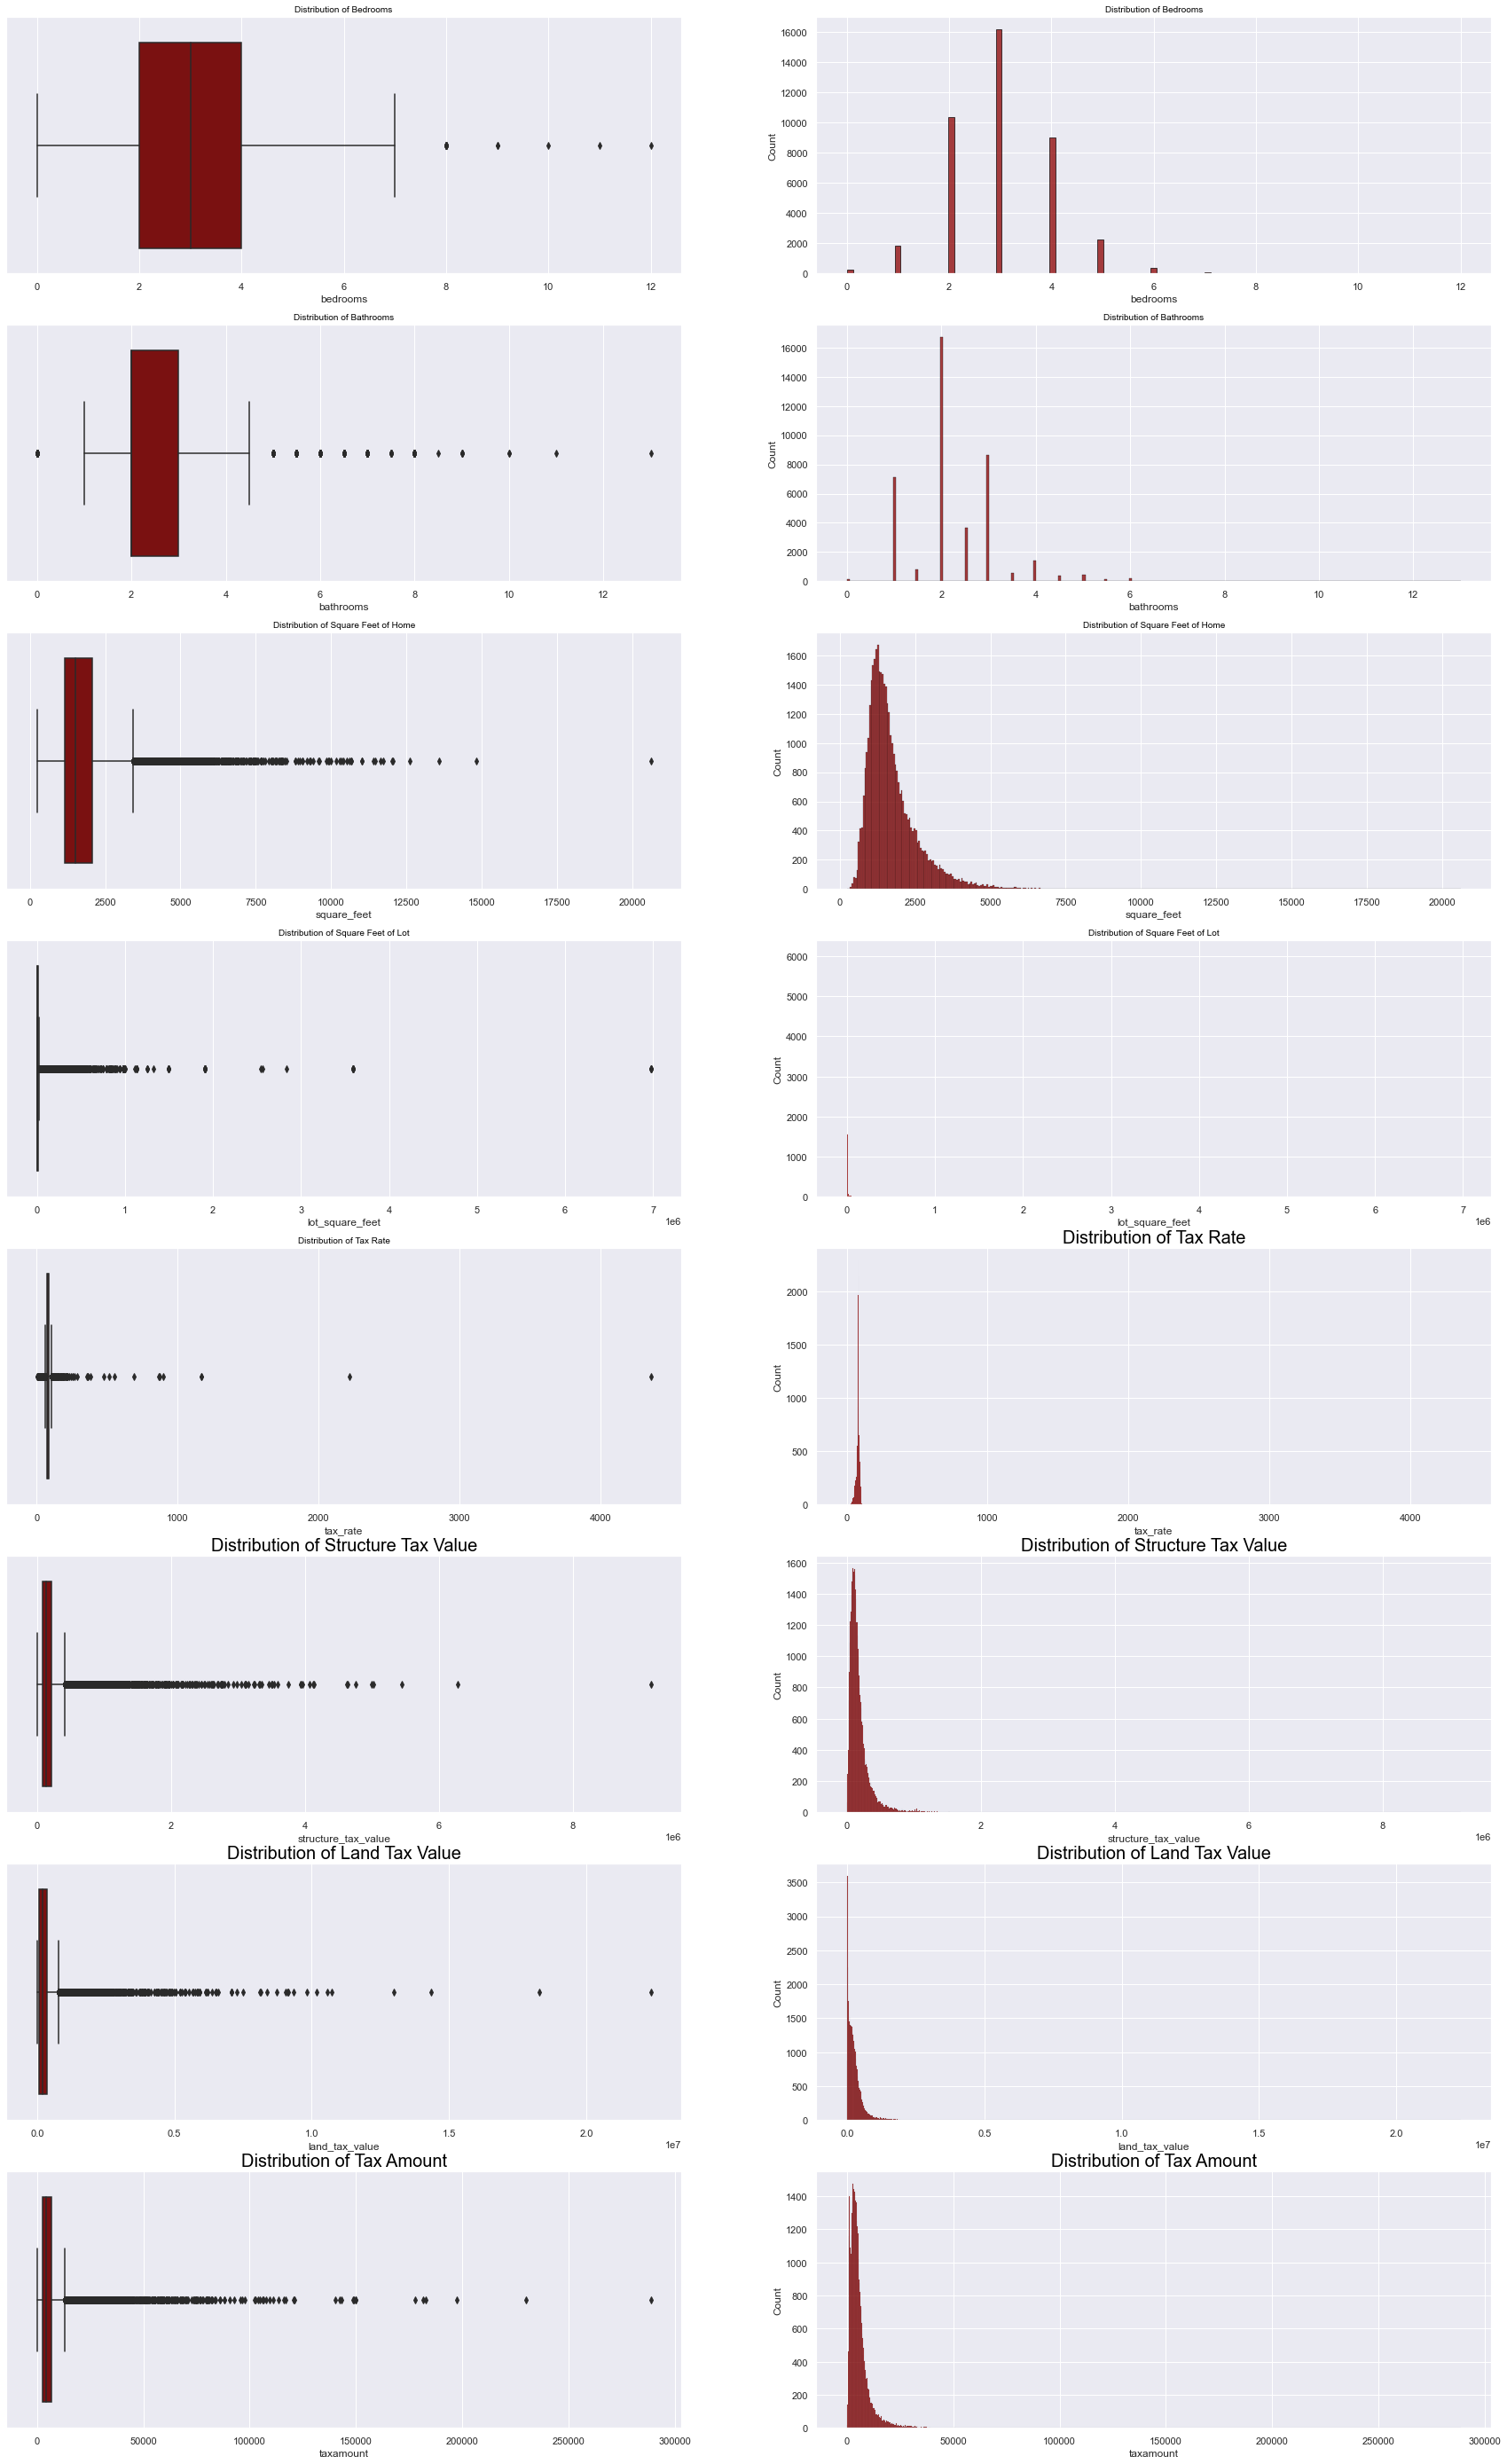

In [13]:
print(f'Boxplots and Histograms of Quantitative Variables', quant_vars)
plt.subplots(8, 2, figsize=(30,50), sharey=True)
sns.set(style="darkgrid")

plt.subplot(8,2,1)
plt.title("Distribution of Bedrooms", size=10, color='black')
sns.boxplot(train.bedrooms, color='darkred')

plt.subplot(8,2,2)
plt.title("Distribution of Bedrooms", size=10, color='black')
sns.histplot(train.bedrooms, color='darkred', ec='black')

plt.subplot(8,2,3)
plt.title("Distribution of Bathrooms", size=10, color='black')
sns.boxplot(train.bathrooms, color='darkred')

plt.subplot(8,2,4)
plt.title("Distribution of Bathrooms", size=10, color='black')
sns.histplot(train.bathrooms, color='darkred', ec='black')

plt.subplot(8,2,5)
plt.title("Distribution of Square Feet of Home", size=10, color='black')
sns.boxplot(train.square_feet, color='darkred')

plt.subplot(8,2,6)
plt.title("Distribution of Square Feet of Home", size=10, color='black')
sns.histplot(train.square_feet, color='darkred', ec='black')

plt.subplot(8,2,7)
plt.title("Distribution of Square Feet of Lot", size=10, color='black')
sns.boxplot(train.lot_square_feet, color='darkred')

plt.subplot(8,2,8)
plt.title("Distribution of Square Feet of Lot", size=10, color='black')
sns.histplot(train.lot_square_feet, color='darkred', ec='black')

plt.subplot(8,2,9)
plt.title("Distribution of Tax Rate", size=10, color='black')
sns.boxplot(train.tax_rate, color='darkred')

plt.subplot(8,2,10)
plt.title("Distribution of Tax Rate", size=20, color='black')
sns.histplot(train.tax_rate, color='darkred', ec='black')

plt.subplot(8,2,11)
plt.title("Distribution of Structure Tax Value", size=20, color='black')
sns.boxplot(train.structure_tax_value, color='darkred')

plt.subplot(8,2,12)
plt.title("Distribution of Structure Tax Value", size=20, color='black')
sns.histplot(train.structure_tax_value, color='darkred', ec='black')

plt.subplot(8,2,13)
plt.title("Distribution of Land Tax Value", size=20, color='black')
sns.boxplot(train.land_tax_value, color='darkred')

plt.subplot(8,2,14)
plt.title("Distribution of Land Tax Value", size=20, color='black')
sns.histplot(train.land_tax_value, color='darkred', ec='black')

plt.subplot(8,2,15)
plt.title("Distribution of Tax Amount", size=20, color='black')
sns.boxplot(train.taxamount, color='darkred')

plt.subplot(8,2,16)
plt.title("Distribution of Tax Amount", size=20, color='black')
sns.histplot(train.taxamount, color='darkred', ec='black')


Takeaways:
- all of them have outliers
    - should run IQR to see about handling these
- pretty much all of them are skewed right

# Bivariate Exploration

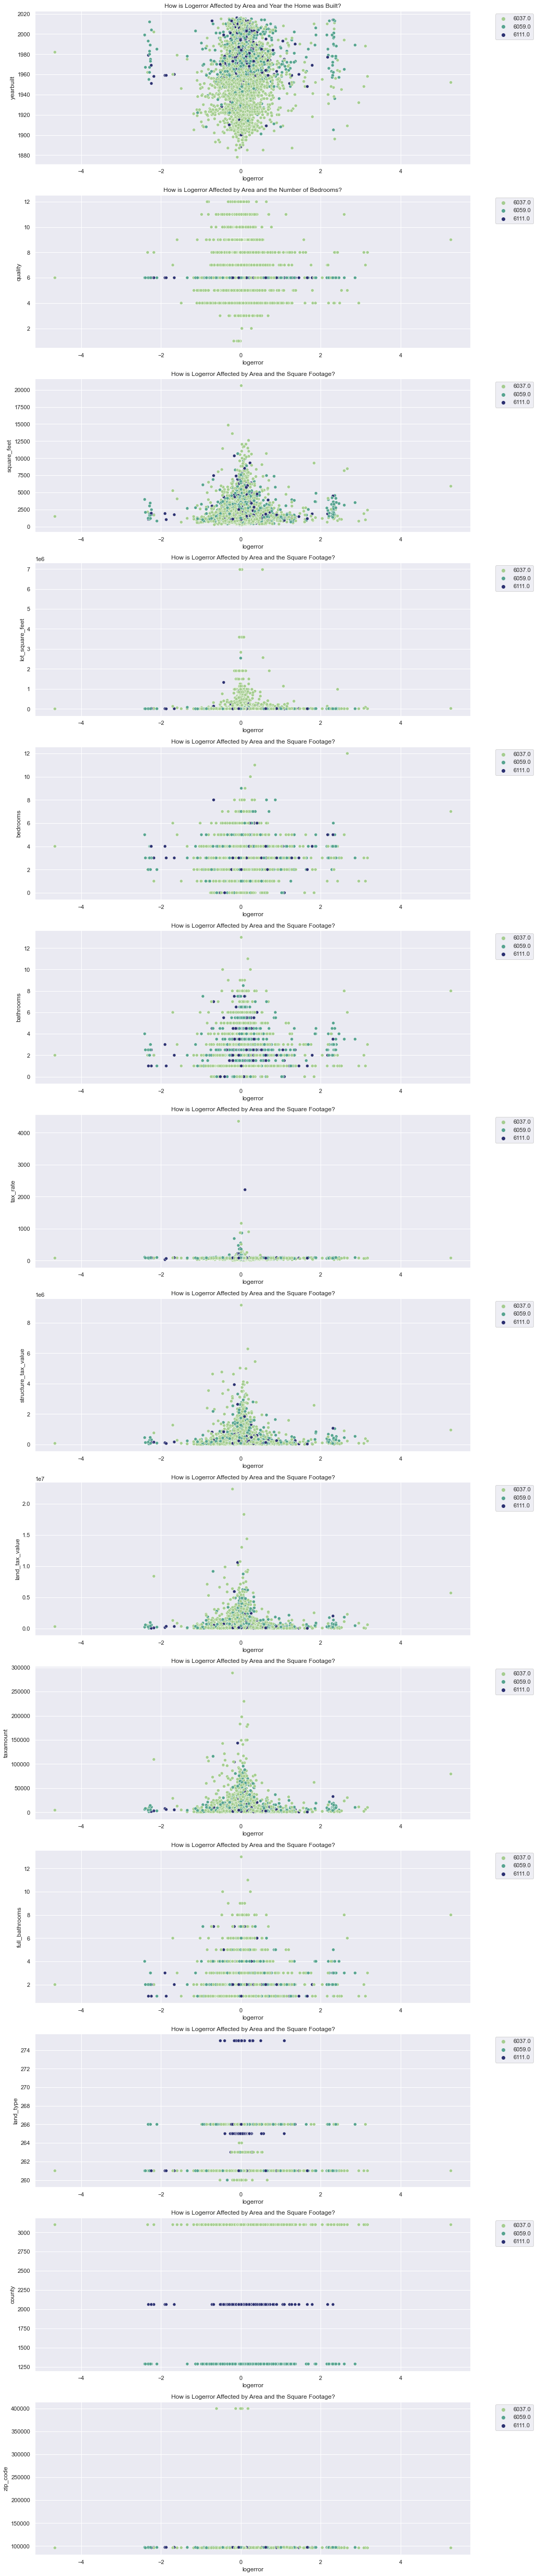

In [14]:
plt.subplots(14,1, figsize=(15,90), sharey=True)
sns.set(style="darkgrid")

plt.subplot(14,1,1)
sns.scatterplot(x='logerror', y='yearbuilt',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and Year the Home was Built?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(14,1,2)
sns.scatterplot(x='logerror', y='quality',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Number of Bedrooms?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,3)
sns.scatterplot(x='logerror', y='square_feet',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,4)
sns.scatterplot(x='logerror', y='lot_square_feet',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,5)
sns.scatterplot(x='logerror', y='bedrooms',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,6)
sns.scatterplot(x='logerror', y='bathrooms',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,7)
sns.scatterplot(x='logerror', y='tax_rate',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,8)
sns.scatterplot(x='logerror', y='structure_tax_value',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,9)
sns.scatterplot(x='logerror', y='land_tax_value',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,10)
sns.scatterplot(x='logerror', y='taxamount',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,11)
sns.scatterplot(x='logerror', y='full_bathrooms',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,12)
sns.scatterplot(x='logerror', y='land_type',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,13)
sns.scatterplot(x='logerror', y='county',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(14,1,14)
sns.scatterplot(x='logerror', y='zip_code',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

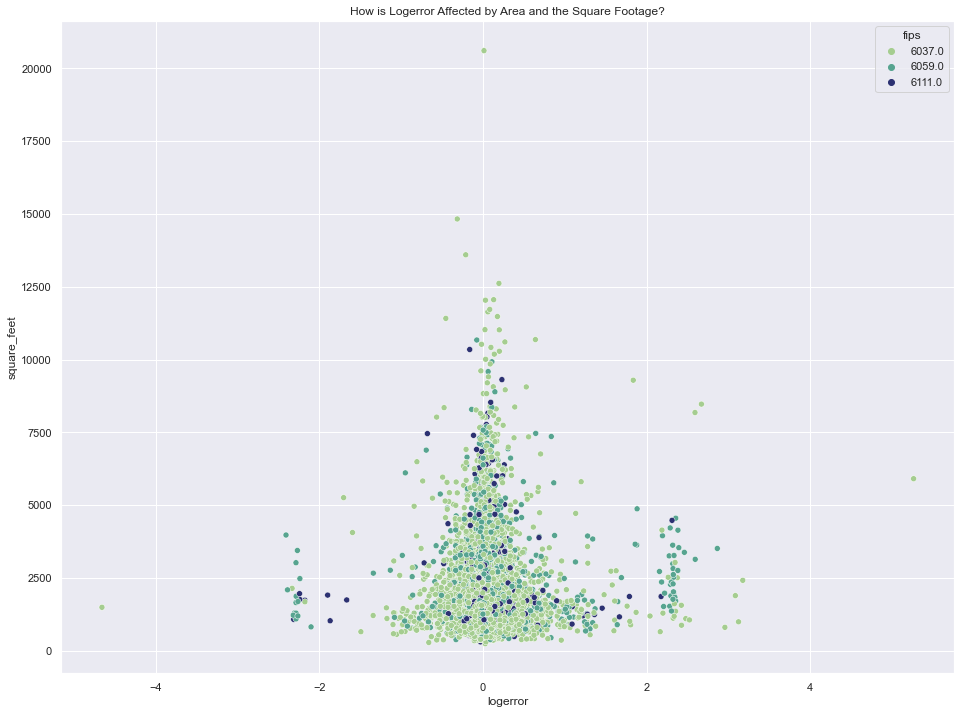

In [15]:
plt.figure(figsize=(16,12))
sns.scatterplot(x='logerror', y='square_feet',
               data=train, hue='fips', palette='crest')
plt.title("How is Logerror Affected by Area and the Square Footage?")
plt.show()

# Multivariate Exploration
Standard:

for var in binary_vars:
    explore.explore_multivariate(train, categorical_target, var, quant_vars)

Takeaways:

# Stats

explore.run_stats_on_everything(train, categorical_target, continuous_target, binary_vars, quant_vars)

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

Bonus:
- Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.